In [27]:
import numpy
import scipy.special
import matplotlib.pyplot

In [28]:
# mnist train
# http://www.pjreddie.com/media/files/mnist_train.csv
# mnist test
# http://www.pjreddie.com/media/files/mnist_test.csv

class neuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        print('__init__()')
        
        # 입력, 은닉, 출력 계층 노드 개수 설정
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        
        # 가중치 행렬 (Weight Input -> Hidden) 와 (Weight Hidden -> Out)
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        print('W I=>H', self.wih)
        print('W H=>O', self.who)
        
        # 학습률
        self.lr = learning_rate
        
        # 신경망 활성화 sigmoid 함수 정의
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    def train(self, inputs_list, targets_list):
        # 입력과 타겟 리스트를 2차원 행렬변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차 (실제 값 - 계산 값)
        output_errors = targets - final_outputs
        #print('output_errors', output_errors)
        # 은닉 계층의 오차 (가중치에 의해 나뉜 출력 계층의 오차들을 재조립하여 계산)
        hidden_errors = numpy.dot(self.who.T, output_errors)
        #print('hidden_errors', hidden_errors)
        
        # 은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
    
    def query(self, inputs_list):
        print('query()')
        
        # input list 2차원 행렬변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [29]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

In [30]:
learning_rate = 0.1

In [31]:
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

__init__()
W I=>H [[-3.93953259e-02  2.33178309e-02 -3.09364449e-02 ...  1.02975975e-01
   3.49601948e-02  3.82318839e-02]
 [-2.10854164e-02 -4.99886313e-02  1.01985292e-02 ...  8.86238456e-02
   1.29322820e-02  1.32012257e-01]
 [ 6.16202580e-02  3.88841769e-05 -4.89091406e-02 ... -3.72625679e-03
  -2.12853652e-02  8.83868089e-02]
 ...
 [ 1.68671439e-01  1.66729610e-02  1.03252752e-01 ...  7.91901978e-02
   3.25970177e-02 -2.14023349e-02]
 [ 4.09368900e-02  4.02636262e-03  5.46661422e-03 ... -3.32440639e-02
  -3.61432351e-02  9.62110291e-02]
 [-8.98992452e-03  3.14835766e-02  5.88420088e-02 ...  2.08919527e-02
   7.72672812e-02  1.85025072e-02]]
W H=>O [[-0.13330788  0.37242785  0.20161348 ...  0.43447536 -0.67204386
  -0.07156769]
 [-0.0638747   0.27175671  0.09979659 ...  0.43943695 -0.49865168
  -0.13292709]
 [-0.08615628  0.13431745 -0.95479824 ...  0.15943187 -0.10909255
  -0.22920497]
 ...
 [-0.39492462  0.11662557  0.41826653 ...  0.52845056  0.02504658
  -0.00409114]
 [ 0.54507

In [32]:
training_data_file = open('data/mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [33]:
epochs = 5
for e in range(epochs):
    print('train start epoch: ', e)
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    print('train done')
    pass

train start epoch:  0
train done
train start epoch:  1
train done
train start epoch:  2
train done
train start epoch:  3
train done
train start epoch:  4
train done


In [34]:
test_data_file = open('data/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [35]:
# 신경망 테스트
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    
    correct_label = int(all_values[0])
    print(correct_label, 'correnct label')
    
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    
    pass


7 correnct label
query()
7 network's answer
2 correnct label
query()
2 network's answer
1 correnct label
query()
1 network's answer
0 correnct label
query()
0 network's answer
4 correnct label
query()
4 network's answer
1 correnct label
query()
1 network's answer
4 correnct label
query()
4 network's answer
9 correnct label
query()
9 network's answer
5 correnct label
query()
5 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
6 correnct label
query()
6 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
5 correnct label
query()
5 network's answer
9 correnct label
query()
9 network's answer
7 correnct label
query()
7 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
9 correnct label
query()
9 network's answer
6 correnct label
query()
6 network's answer
6 correnct label
query()
6 netwo

7 network's answer
9 correnct label
query()
9 network's answer
2 correnct label
query()
2 network's answer
2 correnct label
query()
2 network's answer
4 correnct label
query()
4 network's answer
1 correnct label
query()
1 network's answer
5 correnct label
query()
5 network's answer
9 correnct label
query()
9 network's answer
8 correnct label
query()
8 network's answer
7 correnct label
query()
7 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
0 correnct label
query()
0 network's answer
4 correnct label
query()
2 network's answer
4 correnct label
query()
4 network's answer
2 correnct label
query()
2 network's answer
4 correnct label
query()
4 network's answer
1 correnct label
query()
1 network's answer
9 correnct label
query()
9 network's answer
5 correnct label
query()
5 network's answer
7 correnct label
query()
7 network's answer
7 correnct label
query()
7 network's answer
2 correnct label
query()
2 network's answer
8 correnct la

query()
9 network's answer
8 correnct label
query()
8 network's answer
8 correnct label
query()
8 network's answer
3 correnct label
query()
3 network's answer
7 correnct label
query()
7 network's answer
6 correnct label
query()
6 network's answer
0 correnct label
query()
0 network's answer
0 correnct label
query()
0 network's answer
3 correnct label
query()
3 network's answer
0 correnct label
query()
0 network's answer
2 correnct label
query()
2 network's answer
6 correnct label
query()
0 network's answer
6 correnct label
query()
6 network's answer
4 correnct label
query()
4 network's answer
9 correnct label
query()
8 network's answer
3 correnct label
query()
3 network's answer
3 correnct label
query()
3 network's answer
3 correnct label
query()
3 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
6 cor

4 network's answer
2 correnct label
query()
8 network's answer
4 correnct label
query()
4 network's answer
0 correnct label
query()
0 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
8 correnct label
query()
8 network's answer
6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
7 correnct label
query()
7 network's answer
4 correnct label
query()
4 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
9 correnct label
query()
9 network's answer
5 correnct label
query()
3 network's answer
1 correnct label
query()
1 network's answer
7 correnct label
query()
7 network's answer
3 correnct label
query()
3 network's answer
9 correnct label
query()
9 network's answer
7 correnct label
query()
7 network's answer
6 correnct label
query()
6 network's answer
9 correnct la

5 network's answer
2 correnct label
query()
2 network's answer
7 correnct label
query()
7 network's answer
6 correnct label
query()
6 network's answer
6 correnct label
query()
6 network's answer
9 correnct label
query()
9 network's answer
2 correnct label
query()
2 network's answer
8 correnct label
query()
8 network's answer
3 correnct label
query()
3 network's answer
5 correnct label
query()
5 network's answer
2 correnct label
query()
2 network's answer
2 correnct label
query()
2 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
0 correnct label
query()
0 network's answer
8 correnct label
query()
8 network's answer
2 correnct label
query()
2 network's answer
9 correnct label
query()
9 network's answer
2 correnct label
query()
2 network's answer
8 correnct label
query()
8 network's answer
8 correnct label
query()
8 network's answer
8 correnct label
query()
8 network's answer
8 correnct label
query()
8 network's answer
7 correnct la

query()
1 network's answer
9 correnct label
query()
9 network's answer
2 correnct label
query()
2 network's answer
1 correnct label
query()
1 network's answer
5 correnct label
query()
5 network's answer
8 correnct label
query()
8 network's answer
7 correnct label
query()
1 network's answer
0 correnct label
query()
0 network's answer
2 correnct label
query()
2 network's answer
4 correnct label
query()
4 network's answer
4 correnct label
query()
4 network's answer
3 correnct label
query()
3 network's answer
6 correnct label
query()
6 network's answer
8 correnct label
query()
8 network's answer
8 correnct label
query()
8 network's answer
2 correnct label
query()
2 network's answer
4 correnct label
query()
4 network's answer
0 correnct label
query()
0 network's answer
5 correnct label
query()
5 network's answer
0 correnct label
query()
0 network's answer
4 correnct label
query()
4 network's answer
4 correnct label
query()
4 network's answer
7 correnct label
query()
7 network's answer
9 cor

0 network's answer
9 correnct label
query()
9 network's answer
6 correnct label
query()
6 network's answer
0 correnct label
query()
0 network's answer
6 correnct label
query()
6 network's answer
2 correnct label
query()
2 network's answer
5 correnct label
query()
5 network's answer
4 correnct label
query()
4 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
8 correnct label
query()
8 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
5 correnct label
query()
5 network's answer
0 correnct label
query()
0 network's answer
3 correnct label
query()
3 network's answer
8 correnct label
query()
8 network's answer
5 correnct label
query()
5 network's answer
3 correnct label
query()
3 network's answer
5 correnct label
query()
5 network's answer
8 correnct label
query()
8 network's answer
6 correnct label
query()
6 network's answer
5 correnct label
query()
5 network's answer
7 correnct la

query()
7 network's answer
2 correnct label
query()
2 network's answer
7 correnct label
query()
7 network's answer
1 correnct label
query()
1 network's answer
8 correnct label
query()
8 network's answer
0 correnct label
query()
0 network's answer
7 correnct label
query()
7 network's answer
0 correnct label
query()
0 network's answer
4 correnct label
query()
4 network's answer
3 correnct label
query()
3 network's answer
1 correnct label
query()
1 network's answer
9 correnct label
query()
9 network's answer
8 correnct label
query()
8 network's answer
7 correnct label
query()
7 network's answer
7 correnct label
query()
7 network's answer
1 correnct label
query()
1 network's answer
4 correnct label
query()
4 network's answer
9 correnct label
query()
9 network's answer
9 correnct label
query()
9 network's answer
3 correnct label
query()
3 network's answer
2 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
7 correnct label
query()
7 network's answer
9 cor

query()
8 network's answer
5 correnct label
query()
5 network's answer
2 correnct label
query()
2 network's answer
8 correnct label
query()
8 network's answer
5 correnct label
query()
5 network's answer
7 correnct label
query()
7 network's answer
3 correnct label
query()
3 network's answer
0 correnct label
query()
0 network's answer
8 correnct label
query()
8 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
7 network's answer
2 correnct label
query()
2 network's answer
8 correnct label
query()
8 network's answer
2 correnct label
query()
2 network's answer
5 correnct label
query()
5 network's answer
5 correnct label
query()
5 network's answer
7 correnct label
query()
7 network's answer
6 correnct label
query()
6 network's answer
4 correnct label
query()
4 network's answer
6 correnct label
query()
0 network's answer
8 correnct label
query()
8 network's answer
4 correnct label
query()
4 network's answer
8 correnct label
query()
8 network's answer
2 cor

7 network's answer
1 correnct label
query()
1 network's answer
3 correnct label
query()
3 network's answer
0 correnct label
query()
0 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
4 correnct label
query()
4 network's answer
3 correnct label
query()
3 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
9 correnct label
query()
9 network's answer
7 correnct label
query()
7 network's answer
1 correnct label
query()
1 network's answer
1 correnct label
query()
1 network's answer
7 correnct label
query()
7 network's answer
0 correnct label
query()
0 network's answer
4 correnct label
query()
4 network's answer
9 correnct label
query()
9 network's answer
6 correnct label
query()
6 network's answer
5 correnct label
query()
5 network's answer
9 correnct label
query()
9 network's answer
1 correnct la

2 network's answer
3 correnct label
query()
3 network's answer
3 correnct label
query()
3 network's answer
2 correnct label
query()
2 network's answer
1 correnct label
query()
1 network's answer
7 correnct label
query()
7 network's answer
0 correnct label
query()
0 network's answer
7 correnct label
query()
7 network's answer
6 correnct label
query()
6 network's answer
4 correnct label
query()
4 network's answer
1 correnct label
query()
1 network's answer
3 correnct label
query()
3 network's answer
8 correnct label
query()
8 network's answer
7 correnct label
query()
7 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
9 correnct label
query()
9 network's answer
2 correnct label
query()
2 network's answer
5 correnct label
query()
5 network's answer
1 correnct label
query()
1 network's answer
8 correnct label
query()
8 network's answer
7 correnct label
query()
7 network's answer
3 correnct label
query()
3 network's answer
7 correnct la

5 network's answer
6 correnct label
query()
6 network's answer
2 correnct label
query()
2 network's answer
7 correnct label
query()
4 network's answer
3 correnct label
query()
3 network's answer
6 correnct label
query()
6 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
9 correnct label
query()
9 network's answer
7 correnct label
query()
7 network's answer
6 correnct label
query()
6 network's answer
6 correnct label
query()
6 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
2 correnct label
query()
2 network's answer
9 correnct label
query()
9 network's answer
5 correnct label
query()
8 network's answer
8 correnct label
query()
8 network's answer
3 correnct label
query()
3 network's answer
1 correnct label
query()
1 network's answer
0 correnct label
query()
0 network's answer
0 correnct label
query()
0 network's answer
7 correnct label
query()
7 network's answer
6 correnct la

4 correnct label
query()
4 network's answer
2 correnct label
query()
2 network's answer
6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
4 correnct label
query()
4 network's answer
3 correnct label
query()
3 network's answer
8 correnct label
query()
8 network's answer
0 correnct label
query()
0 network's answer
6 correnct label
query()
6 network's answer
2 correnct label
query()
2 network's answer
1 correnct label
query()
1 network's answer
6 correnct label
query()
6 network's answer
5 correnct label
query()
5 network's answer
3 correnct label
query()
3 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
9 correnct label
query()
9 network's answer
3 correnct label
query()
3 network's answer
2 correnct label
query()
2 network's answer
1 correnct label
query()
1 network's answer
8 correnct label
query()
8 network's answer
4 correnct label
query()
4 network's answer
4 correnct label
query()
4 netwo

7 network's answer
6 correnct label
query()
6 network's answer
1 correnct label
query()
1 network's answer
7 correnct label
query()
7 network's answer
1 correnct label
query()
1 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
7 correnct label
query()
7 network's answer
4 correnct label
query()
4 network's answer
0 correnct label
query()
0 network's answer
0 correnct label
query()
0 network's answer
7 correnct label
query()
7 network's answer
7 correnct label
query()
7 network's answer
6 correnct label
query()
6 network's answer
3 correnct label
query()
3 network's answer
8 correnct label
query()
8 network's answer
6 correnct label
query()
6 network's answer
4 correnct label
query()
4 network's answer
2 correnct label
query()
2 network's answer
0 correnct label
query()
0 network's answer
9 correnct label
query()
1 network's answer
4 correnct label
query()
4 network's answer
0 correnct label
query()
0 network's answer
5 correnct la

3 network's answer
3 correnct label
query()
2 network's answer
6 correnct label
query()
5 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
9 correnct label
query()
9 network's answer
6 correnct label
query()
6 network's answer
8 correnct label
query()
8 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
5 correnct label
query()
0 network's answer
8 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
4 correnct label
query()
4 network's answer
1 correnct label
query()
1 network's answer
8 correnct label
query()
8 network's answer
6 correnct label
query()
6 network's answer
5 correnct label
query()
5 network's answer
2 correnct label
query()
2 network's answer
8 correnct label
query()
5 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
5 correnct label
query()
5 network's answer
4 correnct la

query()
0 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
8 correnct label
query()
8 network's answer
2 correnct label
query()
2 network's answer
2 correnct label
query()
2 network's answer
0 correnct label
query()
0 network's answer
2 correnct label
query()
2 network's answer
5 correnct label
query()
5 network's answer
1 correnct label
query()
1 network's answer
5 correnct label
query()
5 network's answer
1 correnct label
query()
1 network's answer
4 correnct label
query()
6 network's answer
8 correnct label
query()
8 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
1 correnct label
query()
1 network's answer
3 correnct label
query()
3 network's answer
5 correnct label
query()
5 network's answer
1 correnct label
query()
1 network's answer
0 correnct label
query()
0 network's answer
9 cor

query()
1 network's answer
9 correnct label
query()
9 network's answer
9 correnct label
query()
9 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
0 correnct label
query()
0 network's answer
2 correnct label
query()
2 network's answer
0 correnct label
query()
0 network's answer
2 correnct label
query()
2 network's answer
1 correnct label
query()
1 network's answer
1 correnct label
query()
1 network's answer
4 correnct label
query()
4 network's answer
6 correnct label
query()
6 network's answer
4 correnct label
query()
4 network's answer
1 correnct label
query()
1 network's answer
5 correnct label
query()
5 network's answer
4 correnct label
query()
4 network's answer
9 correnct label
query()
9 network's answer
7 correnct label
query()
9 network's answer
7 correnct label
query()
7 network's answer
1 correnct label
query()
1 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
2 cor

7 network's answer
0 correnct label
query()
0 network's answer
3 correnct label
query()
3 network's answer
6 correnct label
query()
6 network's answer
6 correnct label
query()
6 network's answer
4 correnct label
query()
4 network's answer
3 correnct label
query()
3 network's answer
8 correnct label
query()
8 network's answer
8 correnct label
query()
8 network's answer
7 correnct label
query()
4 network's answer
2 correnct label
query()
2 network's answer
2 correnct label
query()
2 network's answer
0 correnct label
query()
0 network's answer
0 correnct label
query()
0 network's answer
9 correnct label
query()
9 network's answer
3 correnct label
query()
3 network's answer
9 correnct label
query()
9 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
9 correnct label
query()
9 network's answer
8 correnct label
query()
8 network's answer
6 correnct label
query()
6 network's answer
6 correnct label
query()
6 network's answer
4 correnct la

6 network's answer
8 correnct label
query()
8 network's answer
4 correnct label
query()
4 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
7 correnct label
query()
7 network's answer
3 correnct label
query()
3 network's answer
0 correnct label
query()
0 network's answer
2 correnct label
query()
2 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
6 correnct label
query()
6 network's answer
6 correnct label
query()
8 network's answer
6 correnct label
query()
6 network's answer
3 correnct label
query()
3 network's answer
6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
7 correnct label
query()
7 network's answer
2 correnct label
query()
2 network's answer
8 correnct label
query()
8 network's answer
6 correnct label
query()
6 network's answer
0 correnct label
query()
0 network's answer
8 correnct label
query()
8 network's answer
3 correnct la

6 correnct label
query()
6 network's answer
3 correnct label
query()
3 network's answer
0 correnct label
query()
0 network's answer
9 correnct label
query()
9 network's answer
3 correnct label
query()
3 network's answer
7 correnct label
query()
7 network's answer
6 correnct label
query()
6 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
9 correnct label
query()
9 network's answer
5 correnct label
query()
5 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
8 correnct label
query()
8 network's answer
8 correnct label
query()
8 network's answer
6 correnct label
query()
6 network's answer
8 correnct label
query()
8 network's answer
1 correnct label
query()
1 network's answer
3 correnct label
query()
3 netwo

2 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
7 correnct label
query()
7 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
8 correnct label
query()
8 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
7 correnct label
query()
7 network's answer
8 correnct label
query()
8 network's answer
6 correnct label
query()
6 network's answer
3 correnct label
query()
2 network's answer
4 correnct la

6 network's answer
2 correnct label
query()
2 network's answer
2 correnct label
query()
2 network's answer
9 correnct label
query()
9 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
8 correnct la

3 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
4 correnct label
query()
4 network's answer
0 correnct label
query()
0 network's answer
9 correnct label
query()
9 network's answer
5 correnct label
query()
5 network's answer
0 correnct label
query()
0 network's answer
8 correnct label
query()
8 network's answer
0 correnct la

4 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
2 network's answer
5 correnct label
query()
3 network's answer
6 correnct label
query()
6 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
8 correnct label
query()
8 network's answer
7 correnct label
query()
7 network's answer
1 correnct label
query()
1 network's answer
3 correnct label
query()
3 network's answer
2 correnct la

1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
8 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
8 correnct label
query()
8 network's answer
6 correnct label
query()
6 network's answer
5 correnct label
query()
5 network's answer
0 correnct label
query()
0 network's answer
6 correnct label
query()
6 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
4 correnct label
query()
4 network's answer
1 correnct label
query()
1 network's answer
9 correnct label
query()
9 network's answer
5 correnct label
query()
3 network's answer
3 correnct label
query()
8 network's answer
0 correnct label
query()
0 network's answer
4 correnct label
query()
4 network's answer
8 correnct la

3 network's answer
4 correnct label
query()
4 network's answer
8 correnct label
query()
8 network's answer
8 correnct label
query()
8 network's answer
5 correnct label
query()
5 network's answer
2 correnct label
query()
2 network's answer
9 correnct label
query()
9 network's answer
7 correnct label
query()
7 network's answer
1 correnct label
query()
1 network's answer
3 correnct label
query()
3 network's answer
8 correnct label
query()
8 network's answer
1 correnct label
query()
1 network's answer
0 correnct label
query()
0 network's answer
7 correnct label
query()
7 network's answer
5 correnct label
query()
5 network's answer
9 correnct label
query()
9 network's answer
6 correnct label
query()
6 network's answer
9 correnct label
query()
9 network's answer
4 correnct label
query()
4 network's answer
7 correnct label
query()
7 network's answer
7 correnct label
query()
7 network's answer
9 correnct label
query()
9 network's answer
9 correnct label
query()
8 network's answer
3 correnct la

query()
6 network's answer
6 correnct label
query()
6 network's answer
3 correnct label
query()
3 network's answer
5 correnct label
query()
5 network's answer
2 correnct label
query()
2 network's answer
5 correnct label
query()
5 network's answer
9 correnct label
query()
9 network's answer
9 correnct label
query()
9 network's answer
8 correnct label
query()
8 network's answer
4 correnct label
query()
4 network's answer
1 correnct label
query()
1 network's answer
0 correnct label
query()
0 network's answer
6 correnct label
query()
6 network's answer
0 correnct label
query()
0 network's answer
9 correnct label
query()
9 network's answer
6 correnct label
query()
6 network's answer
8 correnct label
query()
8 network's answer
8 correnct label
query()
8 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
1 correnct label
query()
1 network's answer
1 correnct label
query()
1 network's answer
9 correnct label
query()
9 network's answer
8 cor

0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
7 correnct label
query()
7 network's answer
8 correnct label
query()
8 network's answer
1 correnct label
query()
1 network's answer
3 correnct label
query()
3 network's answer
5 correnct label
query()
5 network's answer
1 correnct label
query()
1 network's answer
7 correnct label
query()
7 network's answer
7 correnct label
query()
7 network's answer
2 correnct label
query()
2 network's answer
1 correnct label
query()
1 network's answer
4 correnct la

7 network's answer
0 correnct label
query()
0 network's answer
7 correnct label
query()
7 network's answer
4 correnct label
query()
4 network's answer
8 correnct label
query()
8 network's answer
8 correnct label
query()
8 network's answer
5 correnct label
query()
5 network's answer
0 correnct label
query()
0 network's answer
6 correnct label
query()
6 network's answer
6 correnct label
query()
6 network's answer
3 correnct label
query()
3 network's answer
7 correnct label
query()
7 network's answer
6 correnct label
query()
6 network's answer
9 correnct label
query()
9 network's answer
9 correnct label
query()
9 network's answer
4 correnct label
query()
4 network's answer
8 correnct label
query()
8 network's answer
4 correnct label
query()
4 network's answer
1 correnct label
query()
1 network's answer
0 correnct label
query()
0 network's answer
6 correnct label
query()
6 network's answer
6 correnct label
query()
6 network's answer
0 correnct label
query()
0 network's answer
1 correnct la

8 network's answer
1 correnct label
query()
1 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
5 correnct label
query()
5 network's answer
7 correnct label
query()
7 network's answer
2 correnct label
query()
2 network's answer
8 correnct label
query()
8 network's answer
6 correnct label
query()
6 network's answer
3 correnct label
query()
3 network's answer
3 correnct label
query()
3 network's answer
8 correnct label
query()
8 network's answer
6 correnct label
query()
6 network's answer
5 correnct label
query()
5 network's answer
4 correnct label
query()
4 network's answer
0 correnct label
query()
0 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
7 correnct label
query()
7 network's answer
2 correnct label
query()
2 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
5 correnct label
query()
5 network's answer
1 correnct la

3 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
8 correnct la

8 correnct label
query()
8 network's answer
4 correnct label
query()
4 network's answer
6 correnct label
query()
6 network's answer
1 correnct label
query()
1 network's answer
0 correnct label
query()
0 network's answer
4 correnct label
query()
4 network's answer
9 correnct label
query()
9 network's answer
4 correnct label
query()
4 network's answer
2 correnct label
query()
2 network's answer
0 correnct label
query()
0 network's answer
5 correnct label
query()
5 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
6 correnct label
query()
6 network's answer
9 correnct label
query()
9 network's answer
3 correnct label
query()
3 network's answer
2 correnct label
query()
2 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
6 correnct label
query()
6 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
8 network's answer
1 correnct label
query()
1 netwo

6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
3 correnct label
query()
3 network's answer
1 correnct label
query()
1 network's answer
5 correnct label
query()
5 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
4 correnct label
query()
4 network's answer
9 correnct label
query()
9 network's answer
2 correnct label
query()
8 network's answer
4 correnct label
query()
4 netwo

5 network's answer
4 correnct label
query()
4 network's answer
3 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
8 correnct label
query()
8 network's answer
4 correnct label
query()
4 network's answer
6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
0 correnct label
query()
0 network's answer
7 correnct label
query()
7 network's answer
7 correnct label
query()
7 network's answer
1 correnct label
query()
1 network's answer
6 correnct label
query()
6 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
3 correnct label
query()
3 network's answer
6 correnct label
query()
6 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
9 network's answer
8 correnct label
query()
8 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
8 correnct label
query()
8 network's answer
9 correnct la

3 network's answer
1 correnct label
query()
1 network's answer
7 correnct label
query()
7 network's answer
4 correnct label
query()
4 network's answer
7 correnct label
query()
7 network's answer
0 correnct label
query()
0 network's answer
0 correnct label
query()
0 network's answer
6 correnct label
query()
6 network's answer
6 correnct label
query()
6 network's answer
6 correnct label
query()
6 network's answer
3 correnct label
query()
3 network's answer
7 correnct label
query()
7 network's answer
4 correnct label
query()
9 network's answer
2 correnct label
query()
2 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
8 correnct label
query()
8 network's answer
7 correnct label
query()
7 network's answer
1 correnct label
query()
1 network's answer
4 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
4 correnct label
query()
4 network's answer
8 correnct label
query()
8 network's answer
5 correnct la

8 network's answer
4 correnct label
query()
4 network's answer
1 correnct label
query()
1 network's answer
8 correnct label
query()
8 network's answer
6 correnct label
query()
6 network's answer
5 correnct label
query()
5 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
0 correnct label
query()
0 network's answer
0 correnct label
query()
0 network's answer
3 correnct label
query()
3 network's answer
7 correnct label
query()
7 network's answer
1 correnct label
query()
1 network's answer
6 correnct label
query()
6 network's answer
4 correnct label
query()
4 network's answer
6 correnct label
query()
6 network's answer
0 correnct label
query()
0 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
4 correnct label
query()
4 network's answer
1 correnct label
query()
1 network's answer
3 correnct label
query()
3 network's answer
8 correnct label
query()
8 network's answer
6 correnct la

4 network's answer
9 correnct label
query()
9 network's answer
8 correnct label
query()
8 network's answer
5 correnct label
query()
5 network's answer
8 correnct label
query()
8 network's answer
2 correnct label
query()
2 network's answer
6 correnct label
query()
6 network's answer
6 correnct label
query()
6 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
1 correnct label
query()
1 network's answer
3 correnct label
query()
3 network's answer
2 correnct label
query()
2 network's answer
7 correnct label
query()
7 network's answer
3 correnct label
query()
3 network's answer
1 correnct label
query()
1 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
1 correnct label
query()
1 network's answer
3 correnct label
query()
3 network's answer
5 correnct label
query()
5 network's answer
0 correnct label
query()
0 network's answer
7 correnct la

9 network's answer
1 correnct label
query()
1 network's answer
7 correnct label
query()
7 network's answer
8 correnct label
query()
8 network's answer
0 correnct label
query()
0 network's answer
3 correnct label
query()
3 network's answer
5 correnct label
query()
5 network's answer
3 correnct label
query()
3 network's answer
6 correnct label
query()
6 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
4 correnct label
query()
4 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
7 correnct label
query()
7 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
4 correnct la

8 network's answer
8 correnct label
query()
8 network's answer
4 correnct label
query()
4 network's answer
7 correnct label
query()
7 network's answer
7 correnct label
query()
7 network's answer
6 correnct label
query()
6 network's answer
2 correnct label
query()
2 network's answer
1 correnct label
query()
1 network's answer
9 correnct label
query()
9 network's answer
8 correnct label
query()
8 network's answer
7 correnct label
query()
7 network's answer
8 correnct label
query()
8 network's answer
8 correnct label
query()
8 network's answer
7 correnct label
query()
7 network's answer
2 correnct label
query()
2 network's answer
2 correnct label
query()
2 network's answer
3 correnct label
query()
3 network's answer
9 correnct label
query()
9 network's answer
3 correnct label
query()
3 network's answer
3 correnct label
query()
3 network's answer
5 correnct label
query()
5 network's answer
5 correnct label
query()
5 network's answer
0 correnct label
query()
0 network's answer
7 correnct la

query()
7 network's answer
8 correnct label
query()
8 network's answer
9 correnct label
query()
9 network's answer
0 correnct label
query()
0 network's answer
8 correnct label
query()
8 network's answer
3 correnct label
query()
3 network's answer
9 correnct label
query()
9 network's answer
5 correnct label
query()
5 network's answer
5 correnct label
query()
5 network's answer
2 correnct label
query()
2 network's answer
6 correnct label
query()
6 network's answer
8 correnct label
query()
8 network's answer
4 correnct label
query()
4 network's answer
1 correnct label
query()
1 network's answer
7 correnct label
query()
7 network's answer
1 correnct label
query()
1 network's answer
2 correnct label
query()
7 network's answer
3 correnct label
query()
3 network's answer
5 correnct label
query()
5 network's answer
6 correnct label
query()
6 network's answer
9 correnct label
query()
9 network's answer
1 correnct label
query()
1 network's answer
1 correnct label
query()
1 network's answer
1 cor

In [36]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [37]:
scorecard_array = numpy.asarray(scorecard)
print('performance = ', scorecard_array.sum() / scorecard_array.size)

performance =  0.9738


7
query()


array([[0.00955382],
       [0.00469171],
       [0.01054594],
       [0.00335579],
       [0.00949964],
       [0.00649501],
       [0.00334434],
       [0.99776688],
       [0.0017105 ],
       [0.00232406]])

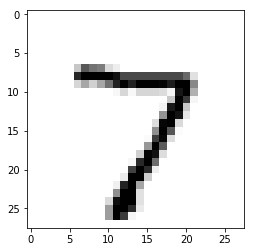

In [38]:
# how can display 
all_values = test_data_list[0].split(',')
print(all_values[0])

image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)